# Tabular Playground Series Dec 2021

In [1]:
# Installing the modules

!pip3 install kaggle

In [11]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [4]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"09b66f16e6edda0614443b2a02389465"}'}

In [5]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Test the command

!kaggle competitions download -c tabular-playground-series-dec-2021

 94% 93.0M/98.9M [00:02<00:00, 37.4MB/s]
100% 98.9M/98.9M [00:02<00:00, 37.4MB/s]
 81% 20.0M/24.7M [00:00<00:00, 39.1MB/s]
100% 24.7M/24.7M [00:00<00:00, 50.3MB/s]
  0% 0.00/2.11M [00:00<?, ?B/s]
100% 2.11M/2.11M [00:00<00:00, 70.7MB/s]


In [7]:
# Extract the zip file

with ZipFile('/content/train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/sample_submission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [9]:
# Load the data

train = pd.read_csv('train.csv', index_col='Id')
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [10]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 0 to 3999999
Data columns (total 55 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Elevation                           int64
 1   Aspect                              int64
 2   Slope                               int64
 3   Horizontal_Distance_To_Hydrology    int64
 4   Vertical_Distance_To_Hydrology      int64
 5   Horizontal_Distance_To_Roadways     int64
 6   Hillshade_9am                       int64
 7   Hillshade_Noon                      int64
 8   Hillshade_3pm                       int64
 9   Horizontal_Distance_To_Fire_Points  int64
 10  Wilderness_Area1                    int64
 11  Wilderness_Area2                    int64
 12  Wilderness_Area3                    int64
 13  Wilderness_Area4                    int64
 14  Soil_Type1                          int64
 15  Soil_Type2                          int64
 16  Soil_Type3                          

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.980192e+03,1.515857e+02,1.509754e+01,2.713154e+02,5.166262e+01,1.766642e+03,2.118375e+02,2.210614e+02,1.408109e+02,1.581407e+03,2.611930e-01,4.166100e-02,6.535732e-01,2.181900e-02,1.684150e-02,3.089600e-02,4.275500e-03,3.791275e-02,1.571525e-02,7.972750e-03,0.0,2.899750e-03,1.089300e-02,5.454075e-02,2.798525e-02,1.829000e-02,3.129525e-02,1.497650e-02,0.0,1.588850e-02,2.067175e-02,1.343625e-02,1.381125e-02,1.736800e-02,1.153900e-02,3.134600e-02,4.917075e-02,2.502175e-02,3.258250e-03,1.352700e-02,1.176575e-02,1.070775e-02,2.227350e-02,2.886700e-02,2.749325e-02,3.746200e-02,3.782075e-02,1.199500e-02,1.605350e-02,1.071275e-02,1.220750e-02,4.075150e-02,3.923925e-02,3.161850e-02,1.771335e+00
std,2.890482e+02,1.099611e+02,8.546731e+00,2.265497e+02,6.821597e+01,1.315610e+03,3.075996e+01,2.223134e+01,4.369864e+01,1.127616e+03,4.392849e-01,1.998133e-01,4.758312e-01,1.460922e-01,1.286774e-01,1.730360e-01,6.524738e-02,1.909853e-01,1.243716e-01,8.893361e-02,0.0,5.377120e-02,1.037995e-01,2.270816e-01,1.649305e-01,1.339981e-01,1.741145e-01,1.214587e-01,0.0,1.250442e-01,1.422829e-01,1.151335e-01,1.167069e-01,1.306383e-01,1.067982e-01,1.742511e-01,2.162244e-01,1.561911e-01,5.698802e-02,1.155163e-01,1.078301e-01,1.029228e-01,1.475717e-01,1.674327e-01,1.635157e-01,1.898910e-01,1.907625e-01,1.088629e-01,1.256813e-01,1.029465e-01,1.098111e-01,1.977140e-01,1.941637e-01,1.749822e-01,8.938060e-01
min,1.773000e+03,-3.300000e+01,-3.000000e+00,-9.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,-2.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,7.810000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

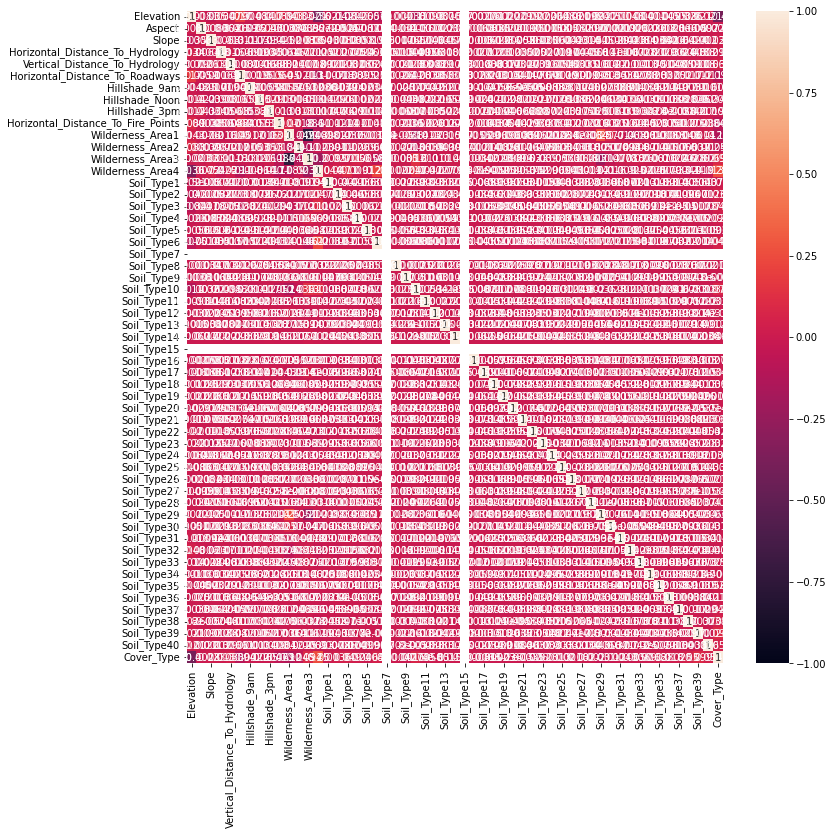

In [12]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [13]:
# Load the data

test = pd.read_csv('test.csv', index_col='Id')
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4000000,2763,78,20,377,88,3104,218,213,195,1931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4000001,2826,153,11,264,39,295,219,238,148,2557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4000002,2948,57,19,56,44,852,202,217,163,1803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4000003,2926,119,6,158,134,2136,234,240,142,857,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4000004,2690,10,4,38,108,3589,213,221,229,431,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are no missing values, in the data.

In [14]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Missing values")

No Missing values


In [15]:
# Seperating out features and labels

X = train.drop(['Cover_Type'], axis=1)
y = train['Cover_Type']

In [16]:
# Train Test Split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=88)

## XGB

In [17]:
# Model Definition

model = XGBClassifier(verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(n_jobs=-1, objective='multi:softprob', verbose=1)

In [18]:
# Model Prediction

test_pred = model.predict(test)
test_pred

array([2, 2, 2, ..., 2, 1, 2])

In [19]:
# Generating output file

submission = pd.read_csv('/content/sample_submission.csv')
submission['Cover_Type'] = test_pred
submission.to_csv('output.csv', index=False)

In [20]:
# Submission

!kaggle competitions submit -c tabular-playground-series-dec-2021 -f output.csv -m "XGB"

100% 9.54M/9.54M [00:02<00:00, 3.89MB/s]
Successfully submitted to Tabular Playground Series - Dec 2021